In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Library for data visualization
from datetime import datetime #Library for dealing with dates
import plotly.express as px
import seaborn as sns

In [39]:
df = pd.read_csv(r"C:\Users\Oluwaferanmi\Downloads\SendMe.csv")

In [40]:
df.head() #Display the first five rows

,Date,Name of Customer,Time of Order,Expected Time out,Expected Time of Delivery,Time Out Update,Why was the Order not Dispatched in 30mins?,Action Taken,New Expected Time Out,New Expected Time of Delivery,...,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value,Fulfilment Center
0,07/06/2022 00:00,Mr Ojo Olukunle,17:05,17:35,18:35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3185.0,Bashorun
1,26/07/2022 00:00,Mrs Adedokun,11:43,12:13,13:13,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Akobo
2,20/08/2022 00:00,Kemi,11:49,12:19,14:19,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Aleshinloye
3,12/08/2022 00:00,Omotayo A.,11:43,12:13,13:13,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Onikolobo
4,03/06/2022 00:00,Osasu,14:37,15:07,17:07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430.0,Alakia


In [41]:
df["Date"] = df["Date"].apply(lambda x: x.split(" ")[0])

In [42]:
def validate(date_text):
    for i in range(len(date_text)):
        try:
            datetime.strptime(date_text[i], '%d/%m/%Y')
        except Exception as e:
            return i

In [43]:
validate(df["Date"])

29

In [44]:
df["Date"][29] #The 29th index in the date series is invalid

'0202-06-28'

In [45]:
df.drop([29], inplace=True)

In [46]:
df["Date"] = pd.to_datetime(df["Date"])

In [47]:
df["Date"].value_counts()

2022-11-06    8
2022-04-30    7
2022-03-06    7
2022-04-06    6
2022-06-17    6
             ..
2022-06-15    1
2022-06-14    1
2022-04-19    1
2025-06-28    1
2023-10-09    1
Name: Date, Length: 130, dtype: int64

In [48]:
df["Date"].dtype

dtype('<M8[ns]')

In [49]:
df["Time of Order"] = pd.to_datetime(df["Time of Order"])
df["Expected Time out"] = pd.to_datetime(df["Expected Time out"])
df["Expected Time of Delivery"] = pd.to_datetime(df["Expected Time of Delivery"])

In [50]:
df.dtypes

Date                                           datetime64[ns]
Name of Customer                                       object
Time of Order                                  datetime64[ns]
Expected Time out                              datetime64[ns]
Expected Time of Delivery                      datetime64[ns]
Time Out Update                                        object
Why was the Order not Dispatched in 30mins?            object
Action Taken                                           object
New Expected Time Out                                  object
New Expected Time of Delivery                          object
Discount Type                                          object
Discount Amount                                       float64
Mode of Payment                                        object
Delivery Status                                        object
Actual Time Of Delivery                                object
Duration(minutes)                                     float64
Customer

In [51]:
column_names = df.columns.values #Display all the column names in the dataset
column_names

array(['Date', 'Name of Customer', 'Time of Order', 'Expected Time out',
       'Expected Time of Delivery', 'Time Out Update',
       'Why was the Order not Dispatched in 30mins?', 'Action Taken',
       'New Expected Time Out', 'New Expected Time of Delivery',
       'Discount Type', 'Discount Amount', 'Mode of Payment',
       'Delivery Status', 'Actual Time Of Delivery', 'Duration(minutes)',
       'Customer Type', 'Token pack(boneless beef)',
       'Token Pack (Cow Tail)', 'Token Pack (Cow Hump)',
       'Token Pack (Cow Head & Neck)', 'Token Pack (Cow Leg)',
       'Token Pack (Agemawo)', 'Token Pack (Cow Assorted)',
       'Token Pack (Pomo)', 'Token Pack (Cow Minced Meat)',
       'Token Pack (Shaki & Roundabout)', 'Value Pack (Agemawo)',
       'Value Pack (Boneless Beef)', 'Value Pack (Cow Head & Neck)',
       'Value Pack (Cow Hump)', 'Value Pack (Cow Assorted)',
       'Token Pack (Goat Meat)', 'Token Pack (Goat Assorted)',
       'Token Pack (Head & Leg)', 'Value Pack (Go

From the above, it can be seen that the prodcut list starts from the 18th column to the 54th column

In [52]:
product_list = column_names[17:53]
product_list

array(['Token pack(boneless beef)', 'Token Pack (Cow Tail)',
       'Token Pack (Cow Hump)', 'Token Pack (Cow Head & Neck)',
       'Token Pack (Cow Leg)', 'Token Pack (Agemawo)',
       'Token Pack (Cow Assorted)', 'Token Pack (Pomo)',
       'Token Pack (Cow Minced Meat)', 'Token Pack (Shaki & Roundabout)',
       'Value Pack (Agemawo)', 'Value Pack (Boneless Beef)',
       'Value Pack (Cow Head & Neck)', 'Value Pack (Cow Hump)',
       'Value Pack (Cow Assorted)', 'Token Pack (Goat Meat)',
       'Token Pack (Goat Assorted)', 'Token Pack (Head & Leg)',
       'Value Pack (Goat Meat)', 'Value Pack (Chicken)',
       'Token Pack (Chicken Gizzard)', 'Token Pack (Chicken)',
       'Value Pack (Titus)', 'Token Pack (Hake)', 'Value Pack (Hake)',
       'Token Pack (Titus)', 'Value Pack (Cow Tongue)', 'Agemawo 1kg',
       'Boneless Beef 1kg', 'Goat Meat 1kg', 'Hake 1kg',
       'Hake 1kg (Cleaned)', 'Titus 1kg', 'Titus 1kg (Cleaned)',
       'Chicken 1kg', 'Cow Head & Neck 1kg'], dtype=ob

In [53]:
df_sub = df.copy()
df_sub = df_sub.iloc[:,17:54]
df_sub

df_sub.fillna(0, inplace = True)

In [54]:
df_sub

,Token pack(boneless beef),Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),Token Pack (Cow Minced Meat),Token Pack (Shaki & Roundabout),...,Agemawo 1kg,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3185.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
296,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49920.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4810.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3770.0


In [55]:
df_sub

,Token pack(boneless beef),Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),Token Pack (Cow Minced Meat),Token Pack (Shaki & Roundabout),...,Agemawo 1kg,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3185.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
296,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49920.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4810.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3770.0


In [56]:
prod_sum = df_sub.sum(axis=0)[0:-1]
products=(prod_sum.index).values
packs_sold=prod_sum.values

dataframe = {"Products":products,"Packs sold":packs_sold}

prod_df = pd.DataFrame(dataframe)
prod_df

# print(packs_sold)

,Products,Packs sold
0,Token pack(boneless beef),22.0
1,Token Pack (Cow Tail),15.0
2,Token Pack (Cow Hump),7.0
3,Token Pack (Cow Head & Neck),11.0
4,Token Pack (Cow Leg),6.0
5,Token Pack (Agemawo),47.0
6,Token Pack (Cow Assorted),19.0
7,Token Pack (Pomo),3.0
8,Token Pack (Cow Minced Meat),1.0
9,Token Pack (Shaki & Roundabout),12.0


In [57]:
#Plot the products against the number of packs sold
fig = px.bar(prod_df,x="Products", y="Packs sold", 
             labels={"Products": "Products",
                     "Packs sold": "No. of packs sold",
             },
             title='Contribution of each product to total sales')
             
fig.show()

From the figure above, we can see that the most product sold within the period of time was the token pack of agemawo

In [58]:
df_sub.head()

,Token pack(boneless beef),Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),Token Pack (Cow Minced Meat),Token Pack (Shaki & Roundabout),...,Agemawo 1kg,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3185.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2340.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1430.0


In [59]:
product_list

array(['Token pack(boneless beef)', 'Token Pack (Cow Tail)',
       'Token Pack (Cow Hump)', 'Token Pack (Cow Head & Neck)',
       'Token Pack (Cow Leg)', 'Token Pack (Agemawo)',
       'Token Pack (Cow Assorted)', 'Token Pack (Pomo)',
       'Token Pack (Cow Minced Meat)', 'Token Pack (Shaki & Roundabout)',
       'Value Pack (Agemawo)', 'Value Pack (Boneless Beef)',
       'Value Pack (Cow Head & Neck)', 'Value Pack (Cow Hump)',
       'Value Pack (Cow Assorted)', 'Token Pack (Goat Meat)',
       'Token Pack (Goat Assorted)', 'Token Pack (Head & Leg)',
       'Value Pack (Goat Meat)', 'Value Pack (Chicken)',
       'Token Pack (Chicken Gizzard)', 'Token Pack (Chicken)',
       'Value Pack (Titus)', 'Token Pack (Hake)', 'Value Pack (Hake)',
       'Token Pack (Titus)', 'Value Pack (Cow Tongue)', 'Agemawo 1kg',
       'Boneless Beef 1kg', 'Goat Meat 1kg', 'Hake 1kg',
       'Hake 1kg (Cleaned)', 'Titus 1kg', 'Titus 1kg (Cleaned)',
       'Chicken 1kg', 'Cow Head & Neck 1kg'], dtype=ob

In [60]:
for index,record in df_sub.iterrows():
    print(index)
    for product in product_list:
        if record[product] == 0.0:
            continue
        else:
            
            print(product)
            print(record["Naira Value"])

0
1
Token Pack (Agemawo)
2340.0
Token Pack (Cow Assorted)
2340.0
2
Token Pack (Cow Head & Neck)
2340.0
Token Pack (Chicken Gizzard)
2340.0
3
Token Pack (Cow Assorted)
2340.0
4
5
6
Agemawo 1kg
7410.0
Boneless Beef 1kg
7410.0
7
8
Token Pack (Cow Head & Neck)
6500.0
Token Pack (Agemawo)
6500.0
9
10
Token Pack (Agemawo)
15600.0
Token Pack (Chicken)
15600.0
Value Pack (Hake)
15600.0
11
Token Pack (Cow Tail)
14040.0
Token Pack (Agemawo)
14040.0
Token Pack (Cow Assorted)
14040.0
Value Pack (Cow Assorted)
14040.0
Value Pack (Chicken)
14040.0
Token Pack (Hake)
14040.0
Value Pack (Hake)
14040.0
Value Pack (Cow Tongue)
14040.0
12
Value Pack (Boneless Beef)
2340.0
13
Chicken 1kg
2470.0
14
Token Pack (Pomo)
1170.0
15
Token Pack (Agemawo)
2600.0
16
17
18
Value Pack (Cow Head & Neck)
2340.0
19
Token Pack (Agemawo)
7020.0
Token Pack (Cow Assorted)
7020.0
Value Pack (Hake)
7020.0
20
21
22
Value Pack (Cow Head & Neck)
2600.0
23
24
25
Token Pack (Chicken)
1300.0
26
Token pack(boneless beef)
3575.0
Token 

1170.0
274
Token pack(boneless beef)
1170.0
275
276
Agemawo 1kg
8320.0
Goat Meat 1kg
8320.0
277
278
279
280
Value Pack (Cow Assorted)
5200.0
Value Pack (Hake)
5200.0
281
Token Pack (Cow Leg)
4680.0
Token Pack (Chicken)
4680.0
Token Pack (Titus)
4680.0
282
Value Pack (Agemawo)
2600.0
283
284
285
286
Value Pack (Boneless Beef)
2340.0
287
Token Pack (Agemawo)
9100.0
288
289
Token Pack (Agemawo)
4810.0
290
Token Pack (Agemawo)
2340.0
Token Pack (Titus)
2340.0
291
Token Pack (Titus)
1170.0
292
Agemawo 1kg
6045.0
Hake 1kg
6045.0
293
Token Pack (Cow Head & Neck)
3510.0
Value Pack (Boneless Beef)
3510.0
294
Token Pack (Cow Tail)
3510.0
Token Pack (Cow Head & Neck)
3510.0
295
Value Pack (Boneless Beef)
2340.0
296
Token Pack (Cow Tail)
49920.0
Value Pack (Agemawo)
49920.0
Value Pack (Cow Assorted)
49920.0
Value Pack (Chicken)
49920.0
297
298
Token Pack (Shaki & Roundabout)
3770.0
299


In [61]:
df.dtypes

Date                                           datetime64[ns]
Name of Customer                                       object
Time of Order                                  datetime64[ns]
Expected Time out                              datetime64[ns]
Expected Time of Delivery                      datetime64[ns]
Time Out Update                                        object
Why was the Order not Dispatched in 30mins?            object
Action Taken                                           object
New Expected Time Out                                  object
New Expected Time of Delivery                          object
Discount Type                                          object
Discount Amount                                       float64
Mode of Payment                                        object
Delivery Status                                        object
Actual Time Of Delivery                                object
Duration(minutes)                                     float64
Customer

In [62]:
df["Name of Customer"].value_counts()

Mrs Adeleke       3
Ola               3
Ammansco          2
Deborah           2
Mrs Babatolu      2
                 ..
Mrs Sulyman       1
Mrs omoyayi       1
Mrs Yvonnegold    1
Bash              1
Mr Oladapo        1
Name: Name of Customer, Length: 279, dtype: int64

### Orders from customer type
This section answers the question of how many orders came from old or existing customers and those that came from new customers.

In [63]:
customer_count = df["Customer Type"].value_counts() #The unique customer types and the count
customer_count

Old Customer    249
New Customer     31
Old Custome       6
Bicycle Op        5
Retail            2
New Custome       1
OFC               1
Name: Customer Type, dtype: int64

In [64]:
new_customer = customer_count["New Customer"] + customer_count["New Custome"]
old_customer = customer_count["Old Customer"] + customer_count["Old Custome"]
other = customer_count["Bicycle Op"] + customer_count["Retail"] + customer_count["OFC"]

labels = ['New Customers','Old Customers','other']
values = [new_customer, old_customer, other]

fig = px.pie(values=values, names=labels, 
             title='Orders from different Customer Types', hole=0.5)
fig.show()

So the above donut plot shows that about 86 percent of the orders are from Old customers, which shows that customers are satisfied with the service and keep coming back. 10.8 per cent is from new customers, which shows there needs to be improved advertisement.

## Week days and weekends

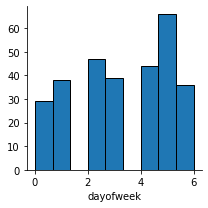

In [95]:
df["dayofweek"] = df["Date"].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
plt.show()

In [96]:
df["dayofweek"].value_counts()

5    66
2    47
4    44
3    39
1    38
6    36
0    29
Name: dayofweek, dtype: int64

According to the above figure, there are more orders on day 5, which is Saturday

In [71]:
df["dayofweek"]

0      2
1      1
2      5
3      3
4      6
      ..
295    4
296    2
297    4
298    6
299    5
Name: dayofweek, Length: 299, dtype: int64

In [72]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Date,Name of Customer,Time of Order,Expected Time out,Expected Time of Delivery,Time Out Update,Why was the Order not Dispatched in 30mins?,Action Taken,New Expected Time Out,New Expected Time of Delivery,...,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value,Fulfilment Center,dayofweek,weekend
0,2022-07-06,Mr Ojo Olukunle,2022-09-13 17:05:00,2022-09-13 17:35:00,2022-09-13 18:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3185.0,Bashorun,2,0
1,2022-07-26,Mrs Adedokun,2022-09-13 11:43:00,2022-09-13 12:13:00,2022-09-13 13:13:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Akobo,1,0
2,2022-08-20,Kemi,2022-09-13 11:49:00,2022-09-13 12:19:00,2022-09-13 14:19:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Aleshinloye,5,1
3,2022-12-08,Omotayo A.,2022-09-13 11:43:00,2022-09-13 12:13:00,2022-09-13 13:13:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Onikolobo,3,0
4,2022-03-06,Osasu,2022-09-13 14:37:00,2022-09-13 15:07:00,2022-09-13 17:07:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1430.0,Alakia,6,1


In [69]:
df["Date"].dtype

dtype('<M8[ns]')

In [65]:
df.head()

,Date,Name of Customer,Time of Order,Expected Time out,Expected Time of Delivery,Time Out Update,Why was the Order not Dispatched in 30mins?,Action Taken,New Expected Time Out,New Expected Time of Delivery,...,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value,Fulfilment Center
0,2022-07-06,Mr Ojo Olukunle,2022-09-13 17:05:00,2022-09-13 17:35:00,2022-09-13 18:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3185.0,Bashorun
1,2022-07-26,Mrs Adedokun,2022-09-13 11:43:00,2022-09-13 12:13:00,2022-09-13 13:13:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Akobo
2,2022-08-20,Kemi,2022-09-13 11:49:00,2022-09-13 12:19:00,2022-09-13 14:19:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Aleshinloye
3,2022-12-08,Omotayo A.,2022-09-13 11:43:00,2022-09-13 12:13:00,2022-09-13 13:13:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Onikolobo
4,2022-03-06,Osasu,2022-09-13 14:37:00,2022-09-13 15:07:00,2022-09-13 17:07:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430.0,Alakia


In [75]:
df["weekend"].value_counts()

0    153
1    146
Name: weekend, dtype: int64

In [80]:
weekend = df.groupby("weekend")

In [90]:
weekend_amount = weekend.get_group(0).sum()["Naira Value"]
print(f"The total amount made on a weekend is {weekend_amount}")

The total amount made on a weekend is 659425.0


C:\Users\OLUWAF~1\AppData\Local\Temp/ipykernel_2080/3453183035.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [91]:
weekday_amount = weekend.get_group(1).sum()["Naira Value"]
print(f"The total amount made on a weekend is {weekday_amount}")

The total amount made on a weekend is 693485.0


C:\Users\OLUWAF~1\AppData\Local\Temp/ipykernel_2080/2362394695.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



More money was made on the weekend - N693,485, compared to the weekdays - N659,425